In [1]:
import os
from glob import glob
from random import choice
from os.path import join, sep

In [2]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from dotenv import find_dotenv, load_dotenv

In [3]:
from src.addons.watermark.models import create_watermark, create_extract_mark
from src.addons.images.mark import random_mark
from src.addons.data.augment import attacks
from src.addons.images.load import get_image_and_mark

In [4]:
plt.rcParams["figure.figsize"] = (12,10)

---

In [5]:
_ = load_dotenv(find_dotenv())

In [6]:
images_path = glob(join(os.environ.get("RAW_PATH"), "tests") + sep + "*.jpg")
image_path = choice(images_path)

In [7]:
embedding = create_watermark((128, 128, 3), (8, 8, 1), 1.)
embedding.load_weights(join(os.environ.get("MODELS_PATH"), "storage", "embedding.25_12_2023_20_03_40.weights.h5"))

2023-12-25 23:29:06.339585: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-25 23:29:06.339607: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-12-25 23:29:06.339611: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-12-25 23:29:06.339643: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-25 23:29:06.339660: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
extractor = create_extract_mark((128, 128, 3))
extractor.load_weights(join(os.environ.get("MODELS_PATH"), "storage", "extractor.25_12_2023_20_03_40.weights.h5"))

---

In [9]:
image, mark = get_image_and_mark(image_path)

2023-12-25 23:29:07.758101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [10]:
image = tf.expand_dims(image, axis=0)
mark = tf.expand_dims(mark, axis=0)

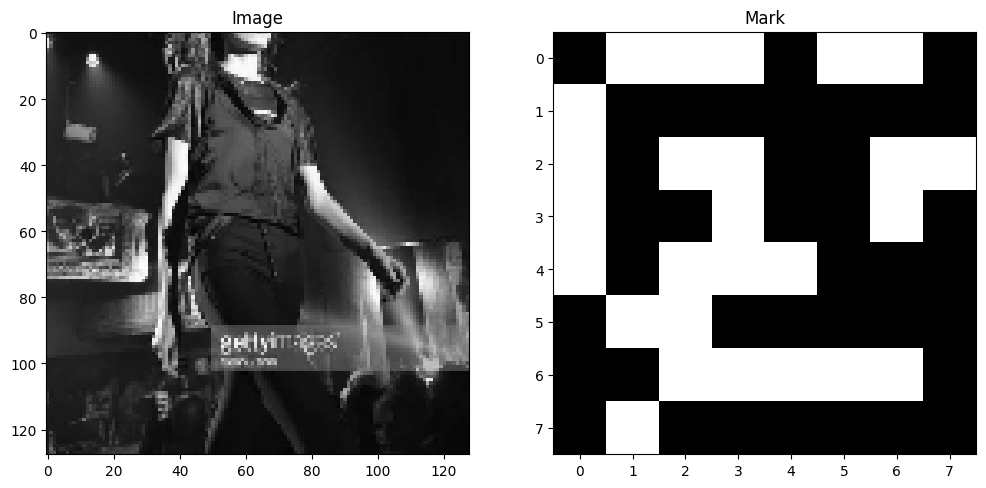

In [11]:
plt.subplot(1, 2, 1)
plt.imshow(image[0], cmap="gray")
plt.title("Image")

plt.subplot(1, 2, 2)
plt.imshow(mark[0], cmap="gray")
plt.title("Mark")

plt.show()

---

## Identity

In [12]:
output_image = embedding([image, mark], training=False)
attack_image = attacks["identity"](output_image)
output_mark = extractor(attack_image, training=False)

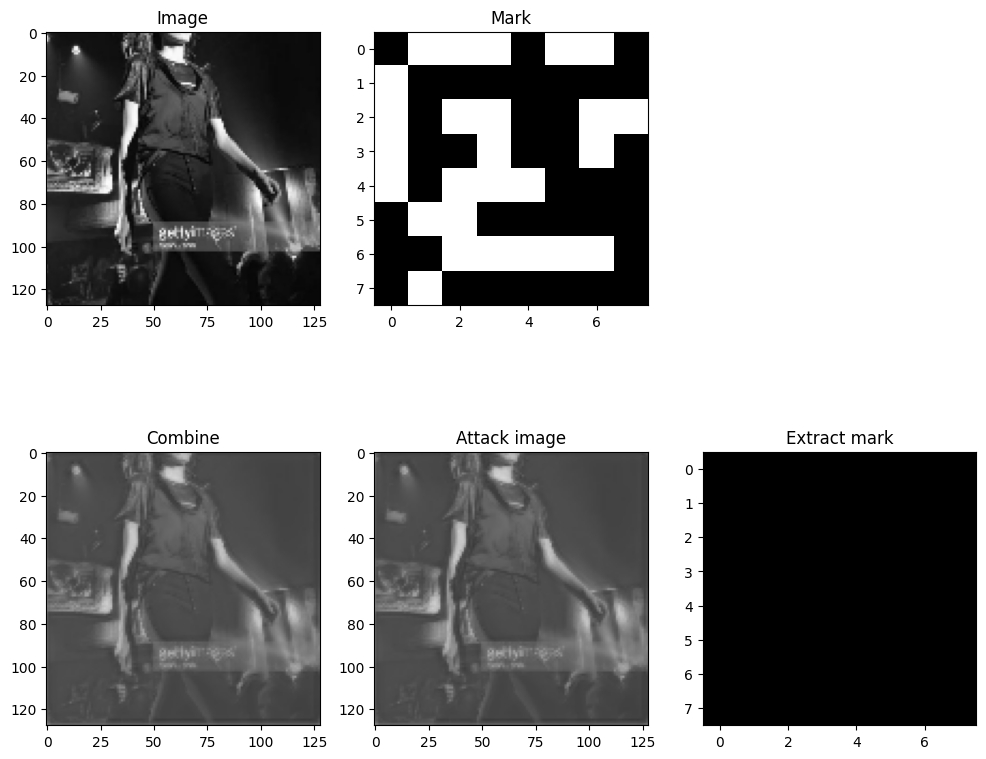

In [13]:
plt.subplot(2, 3, 1)
plt.imshow(image[0], cmap="gray")
plt.title("Image")

plt.subplot(2, 3, 2)
plt.imshow(mark[0], cmap="gray")
plt.title("Mark")

plt.subplot(2, 3, 4)
plt.imshow(tf.cast(output_image[0], tf.uint8), cmap="gray")
plt.title("Combine")

plt.subplot(2, 3, 5)
plt.imshow(tf.cast(attack_image[0], tf.uint8), cmap="gray")
plt.title("Attack image")

plt.subplot(2, 3, 6)
plt.imshow(output_mark[0], cmap="gray")
plt.title("Extract mark")

plt.show()

---

## Gaussian filter

In [14]:
output_image = embedding([image, mark], training=False)
attack_image = attacks["gaussian_blur"](output_image)
output_mark = extractor(attack_image, training=False)

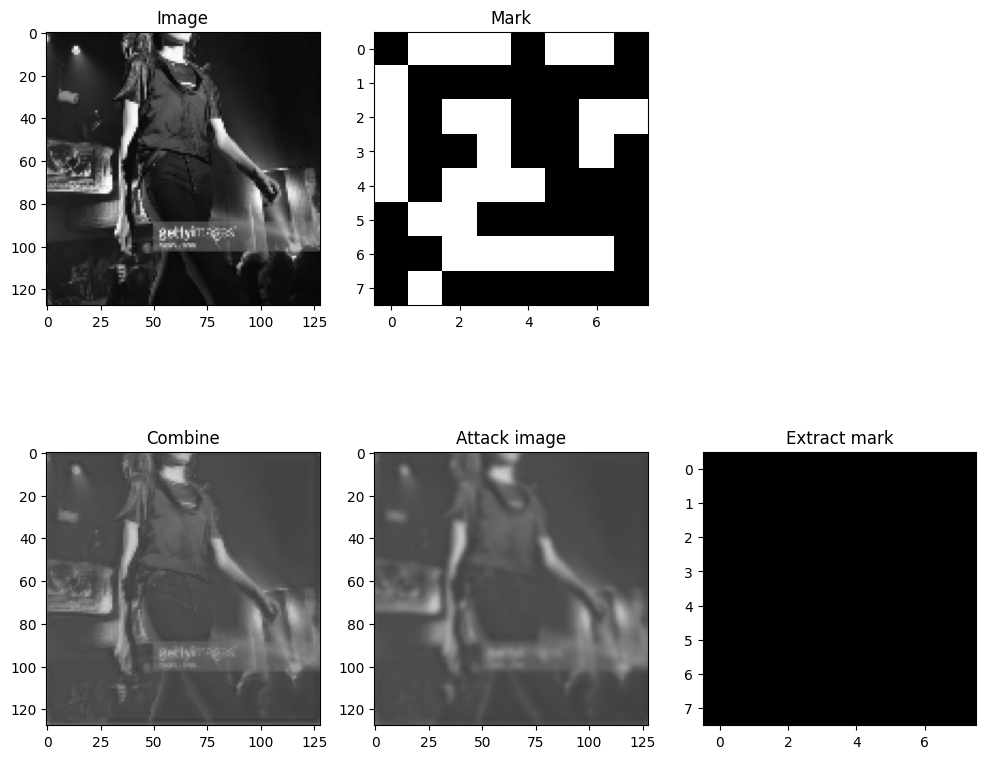

In [15]:
plt.subplot(2, 3, 1)
plt.imshow(image[0], cmap="gray")
plt.title("Image")

plt.subplot(2, 3, 2)
plt.imshow(mark[0], cmap="gray")
plt.title("Mark")

plt.subplot(2, 3, 4)
plt.imshow(tf.cast(output_image[0], tf.uint8), cmap="gray")
plt.title("Combine")

plt.subplot(2, 3, 5)
plt.imshow(tf.cast(attack_image[0], tf.uint8), cmap="gray")
plt.title("Attack image")

plt.subplot(2, 3, 6)
plt.imshow(output_mark[0], cmap="gray")
plt.title("Extract mark")

plt.show()

---

## Average filter

In [16]:
output_image = embedding([image, mark], training=False)
attack_image = attacks["average_blur"](output_image)
output_mark = extractor(attack_image, training=False)

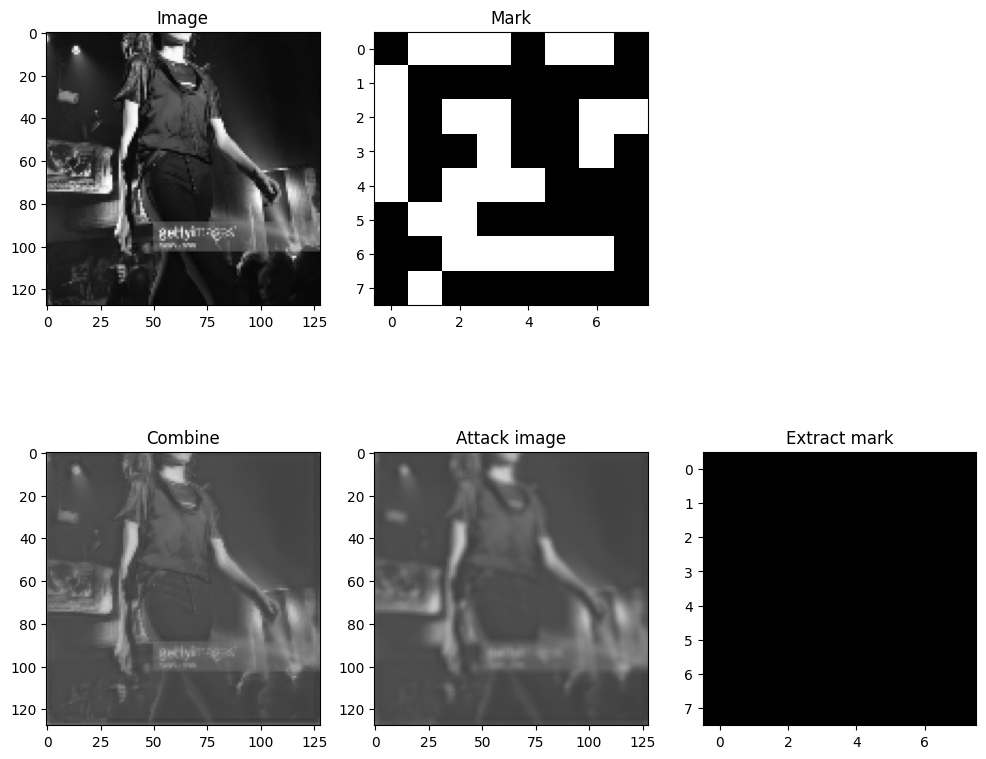

In [17]:
plt.subplot(2, 3, 1)
plt.imshow(image[0], cmap="gray")
plt.title("Image")

plt.subplot(2, 3, 2)
plt.imshow(mark[0], cmap="gray")
plt.title("Mark")

plt.subplot(2, 3, 4)
plt.imshow(tf.cast(output_image[0], tf.uint8), cmap="gray")
plt.title("Combine")

plt.subplot(2, 3, 5)
plt.imshow(tf.cast(attack_image[0], tf.uint8), cmap="gray")
plt.title("Attack image")

plt.subplot(2, 3, 6)
plt.imshow(output_mark[0], cmap="gray")
plt.title("Extract mark")

plt.show()

---

## Median filter

In [18]:
output_image = embedding([image, mark], training=False)
attack_image = attacks["median_blur"](output_image)
output_mark = extractor(attack_image, training=False)

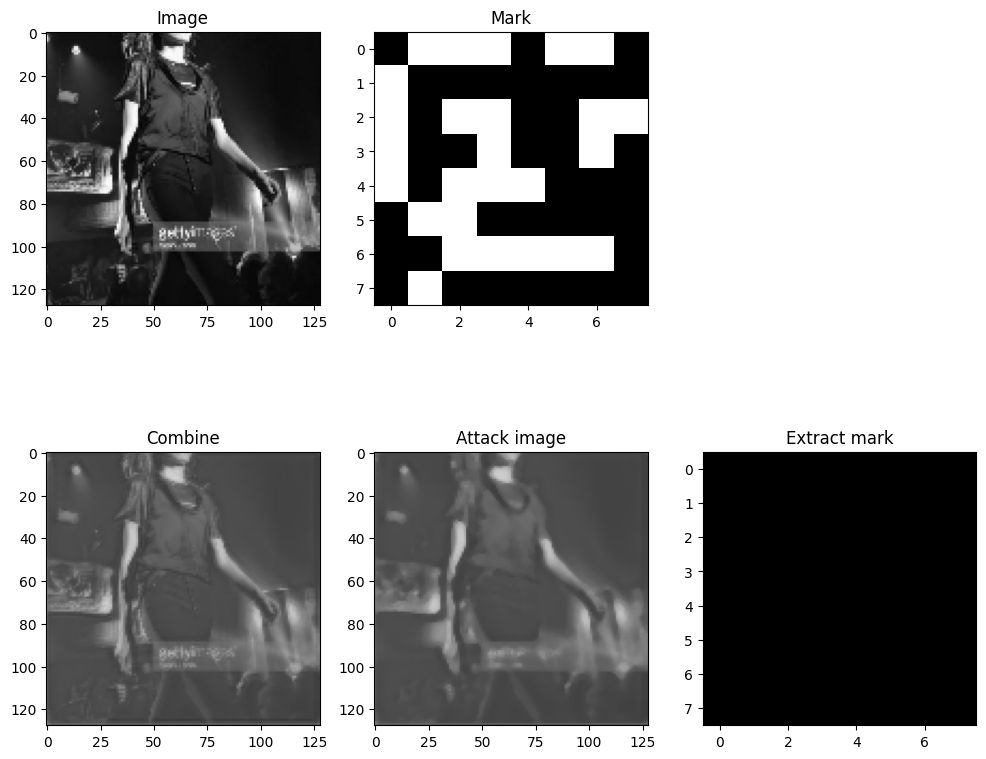

In [19]:
plt.subplot(2, 3, 1)
plt.imshow(image[0], cmap="gray")
plt.title("Image")

plt.subplot(2, 3, 2)
plt.imshow(mark[0], cmap="gray")
plt.title("Mark")

plt.subplot(2, 3, 4)
plt.imshow(tf.cast(output_image[0], tf.uint8), cmap="gray")
plt.title("Combine")

plt.subplot(2, 3, 5)
plt.imshow(tf.cast(attack_image[0], tf.uint8), cmap="gray")
plt.title("Attack image")

plt.subplot(2, 3, 6)
plt.imshow(output_mark[0], cmap="gray")
plt.title("Extract mark")

plt.show()

---

## Salt & Pepper

In [20]:
output_image = embedding([image, mark], training=False)
attack_image = attacks["salt_pepper"](output_image)
output_mark = extractor(attack_image, training=False)

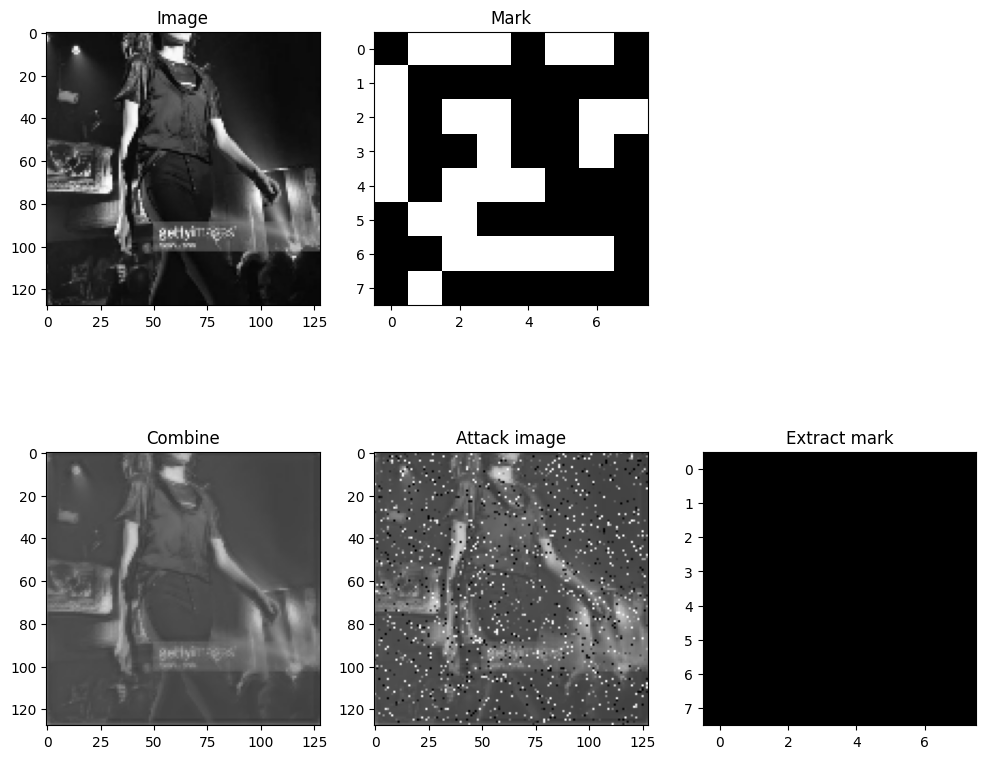

In [21]:
plt.subplot(2, 3, 1)
plt.imshow(image[0], cmap="gray")
plt.title("Image")

plt.subplot(2, 3, 2)
plt.imshow(mark[0], cmap="gray")
plt.title("Mark")

plt.subplot(2, 3, 4)
plt.imshow(tf.cast(output_image[0], tf.uint8), cmap="gray")
plt.title("Combine")

plt.subplot(2, 3, 5)
plt.imshow(tf.cast(attack_image[0], tf.uint8), cmap="gray")
plt.title("Attack image")

plt.subplot(2, 3, 6)
plt.imshow(output_mark[0], cmap="gray")
plt.title("Extract mark")

plt.show()

---

## Gaussian noise

In [22]:
output_image = embedding([image, mark], training=False)
attack_image = attacks["gaussian_noise"](output_image)
output_mark = extractor(attack_image, training=False)

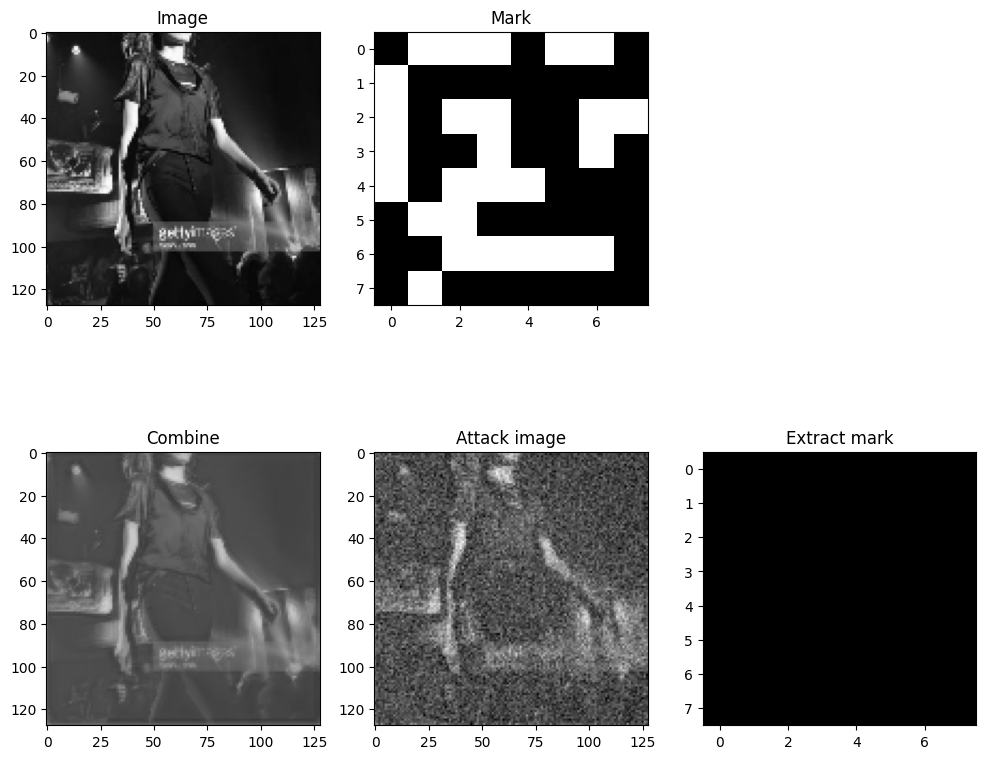

In [23]:
plt.subplot(2, 3, 1)
plt.imshow(image[0], cmap="gray")
plt.title("Image")

plt.subplot(2, 3, 2)
plt.imshow(mark[0], cmap="gray")
plt.title("Mark")

plt.subplot(2, 3, 4)
plt.imshow(tf.cast(output_image[0], tf.uint8), cmap="gray")
plt.title("Combine")

plt.subplot(2, 3, 5)
plt.imshow(tf.cast(attack_image[0], tf.uint8), cmap="gray")
plt.title("Attack image")

plt.subplot(2, 3, 6)
plt.imshow(output_mark[0], cmap="gray")
plt.title("Extract mark")

plt.show()

---

## Image Quality

In [24]:
output_image = embedding([image, mark], training=False)
attack_image = attacks["image_quality"](output_image)
output_mark = extractor(attack_image, training=False)

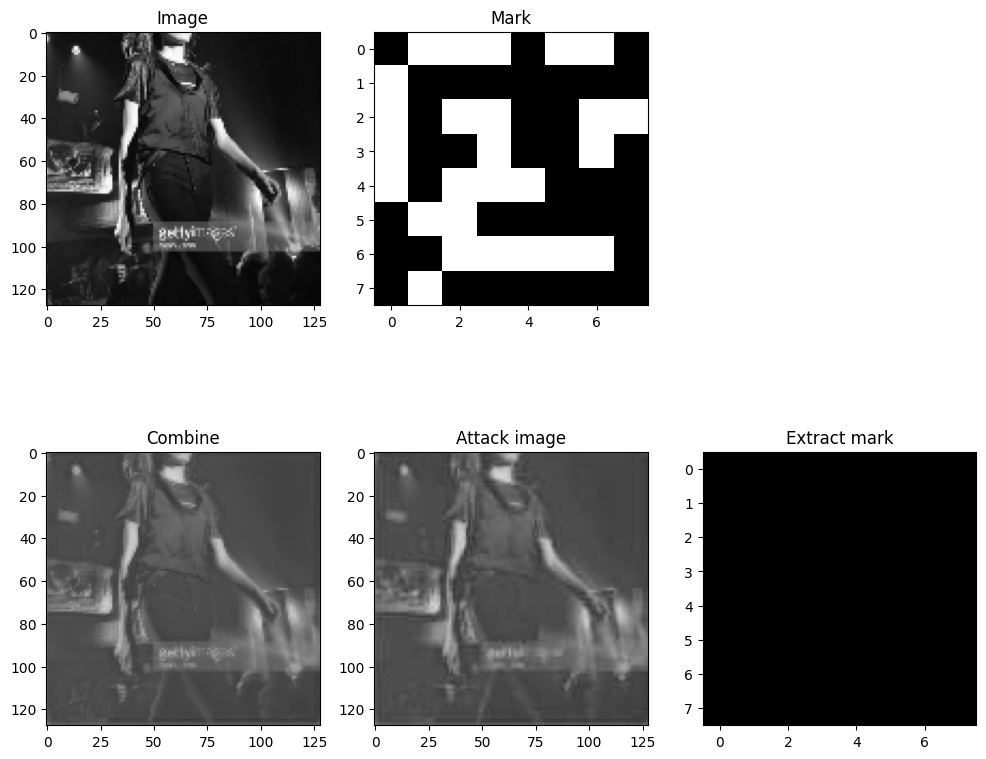

In [25]:
plt.subplot(2, 3, 1)
plt.imshow(image[0], cmap="gray")
plt.title("Image")

plt.subplot(2, 3, 2)
plt.imshow(mark[0], cmap="gray")
plt.title("Mark")

plt.subplot(2, 3, 4)
plt.imshow(tf.cast(output_image[0], tf.uint8), cmap="gray")
plt.title("Combine")

plt.subplot(2, 3, 5)
plt.imshow(tf.cast(attack_image[0], tf.uint8), cmap="gray")
plt.title("Attack image")

plt.subplot(2, 3, 6)
plt.imshow(output_mark[0], cmap="gray")
plt.title("Extract mark")

plt.show()

---

## Rotation

In [26]:
output_image = embedding([image, mark], training=False)
attack_image = attacks["rotation"](output_image)
output_mark = extractor(attack_image, training=False)

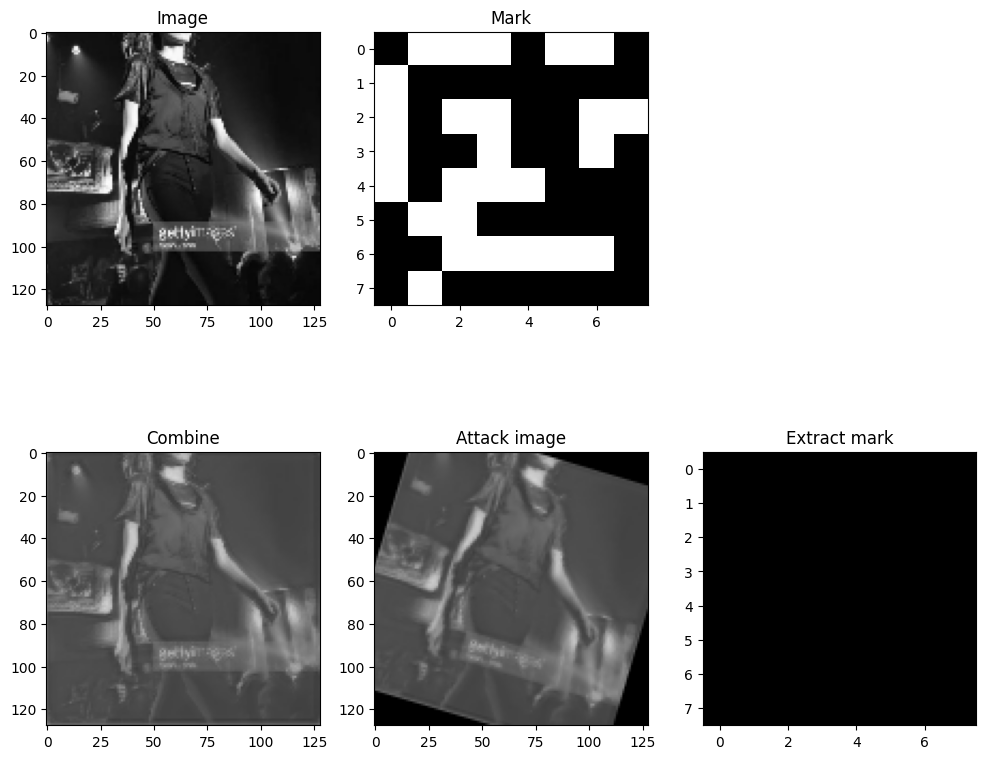

In [27]:
plt.subplot(2, 3, 1)
plt.imshow(image[0], cmap="gray")
plt.title("Image")

plt.subplot(2, 3, 2)
plt.imshow(mark[0], cmap="gray")
plt.title("Mark")

plt.subplot(2, 3, 4)
plt.imshow(tf.cast(output_image[0], tf.uint8), cmap="gray")
plt.title("Combine")

plt.subplot(2, 3, 5)
plt.imshow(tf.cast(attack_image[0], tf.uint8), cmap="gray")
plt.title("Attack image")

plt.subplot(2, 3, 6)
plt.imshow(output_mark[0], cmap="gray")
plt.title("Extract mark")

plt.show()

---

## Crop

In [28]:
output_image = embedding([image, mark], training=False)
attack_image = attacks["crop"](output_image)
output_mark = extractor(attack_image, training=False)

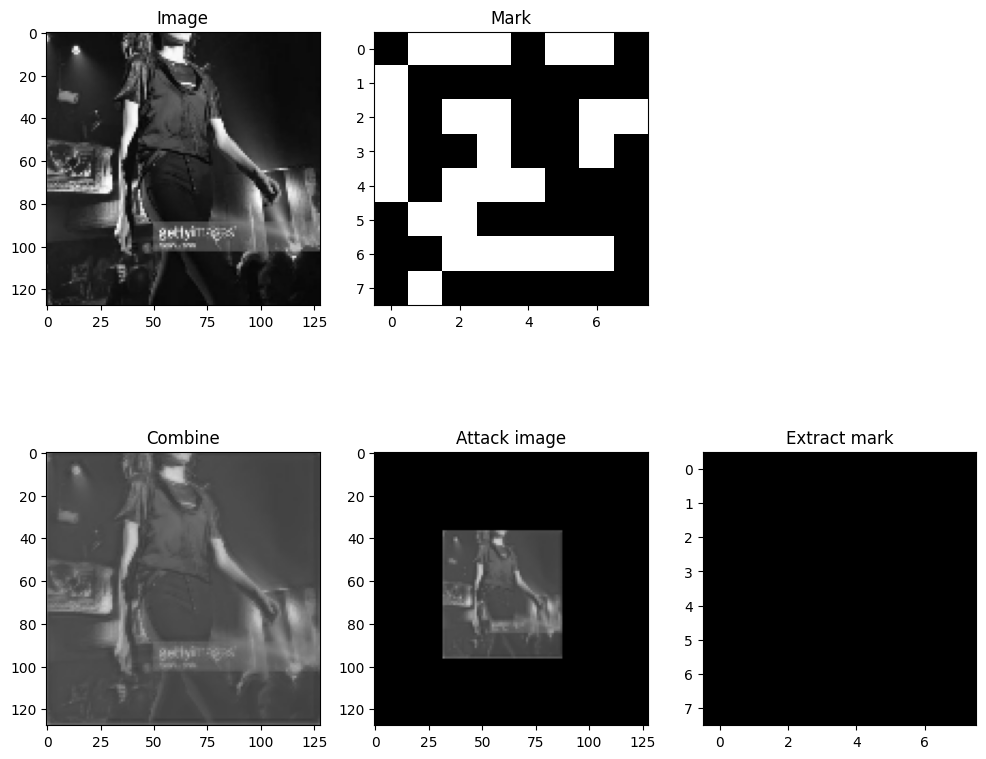

In [29]:
plt.subplot(2, 3, 1)
plt.imshow(image[0], cmap="gray")
plt.title("Image")

plt.subplot(2, 3, 2)
plt.imshow(mark[0], cmap="gray")
plt.title("Mark")

plt.subplot(2, 3, 4)
plt.imshow(tf.cast(output_image[0], tf.uint8), cmap="gray")
plt.title("Combine")

plt.subplot(2, 3, 5)
plt.imshow(tf.cast(attack_image[0], tf.uint8), cmap="gray")
plt.title("Attack image")

plt.subplot(2, 3, 6)
plt.imshow(output_mark[0], cmap="gray")
plt.title("Extract mark")

plt.show()

---

## Dropout

In [30]:
output_image = embedding([image, mark], training=False)
attack_image = attacks["dropout"](output_image)
output_mark = extractor(attack_image, training=False)

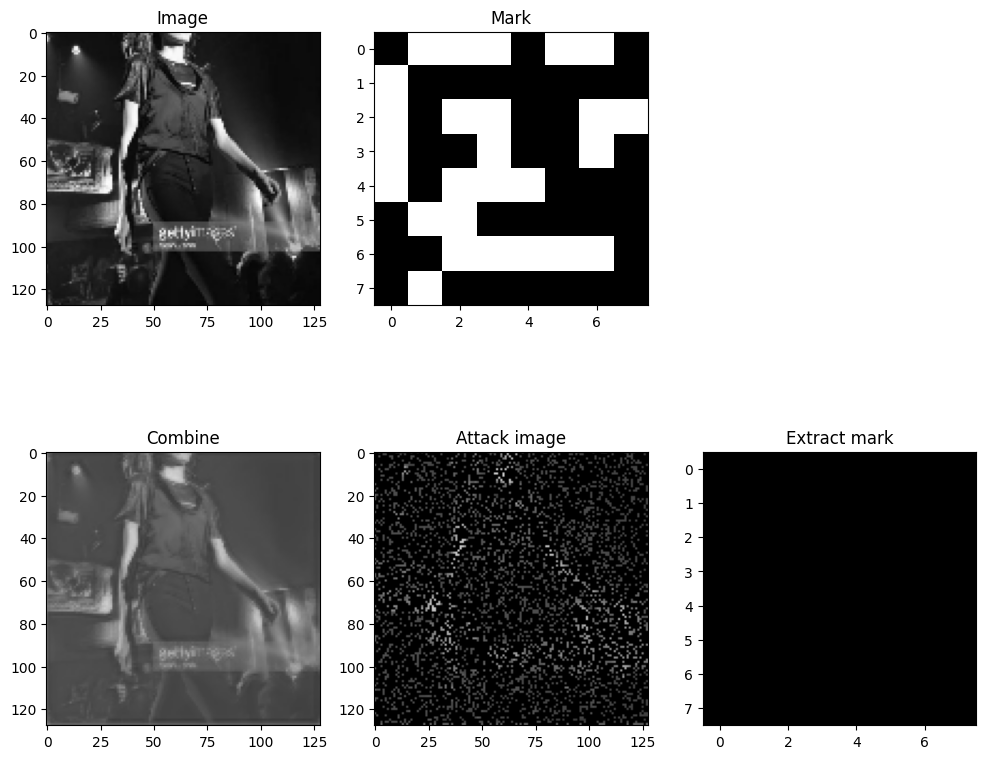

In [31]:
plt.subplot(2, 3, 1)
plt.imshow(image[0], cmap="gray")
plt.title("Image")

plt.subplot(2, 3, 2)
plt.imshow(mark[0], cmap="gray")
plt.title("Mark")

plt.subplot(2, 3, 4)
plt.imshow(tf.cast(output_image[0], tf.uint8), cmap="gray")
plt.title("Combine")

plt.subplot(2, 3, 5)
plt.imshow(tf.cast(attack_image[0], tf.uint8), cmap="gray")
plt.title("Attack image")

plt.subplot(2, 3, 6)
plt.imshow(output_mark[0], cmap="gray")
plt.title("Extract mark")

plt.show()